<a href="https://colab.research.google.com/github/ShrRa/UNG_OpenDay_ConvDemo/blob/main/ConvolutionDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# For opening in Google Colab
#!pip install jupyter_bokeh

In [1]:
import panel as pn
import holoviews as hv
from holoviews import opts
import cv2
import time
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pn.extension()

In [3]:
from bokeh.resources  import settings

#settings.resources = 'inline'

### Files and directories

In [12]:
image_paths = {
    'Image 1': './images/image_1.jpg',
    'Image 2': './images/image_2.jpg',
    'Image 3': './images/image_3.jpg'
}

In [17]:
kernels = {
    'vertical': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    'horizontal': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    'laplacian': np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
}

### Functions

In [18]:
# Function to select source image
def select_source_image(event):
    image_path = image_paths[selector_image.value]
    try:
        #image = hv.RGB.load_image(image_path).opts(opts.RGB(width=400, height=300))
        #image = Image.new('RGB', (400, 300), color='white')
        image = Image.open(image_path)
        #image = image.resize((400, 300))
        pane_source_image.object = image
    except Exception as e:
        print(f"Error loading image: {e}")
        pane_source_image.object = hv.Text(0, 0, f"Error loading {image_path}")

In [19]:
# Function to convolve the source image
def convolve_image(image_path, kernel_type):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print("Error: Could not load image at", image_path)
            return None
        if kernel_type not in kernels.keys():
            print("Error: Invalid kernel type.")
            return None
        kernel = kernels[kernel_type]
        convolved_img = Image.fromarray(cv2.filter2D(img, -1, kernel))
        return convolved_img
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [20]:
# Function to reveal convolution image patch by patch
def reveal_convolution(event):
    print('clicked')
    try:
        image_path = image_paths[selector_image.value]
        kernel_type = selector_kernel.value
        convolved_img = convolve_image(image_path, kernel_type)

        width, height = convolved_img.size
        #part_width = int(0.1 * width)
        #part_height = int(0.1 * height)
        part_width = 3
        part_height = 3
        revealed_image = Image.new('RGB', (width, height), color='gray')

        for i in range(0, height, part_height):
            for j in range(0, width, part_width):
                part = convolved_img.crop((j, i, min(j + part_width, width), min(i + part_height, height)))
                revealed_image.paste(part, (j, i))
                pane_convolved_image.object = revealed_image
                time.sleep(0.005)
    except Exception as e:
        print(f"Error revealing image: {e}")
        pane_convolved_image.object = "Error revealing image."

### Layout

In [21]:
selector_image = pn.widgets.Select(name='Select Image', options=list(image_paths.keys()))
selector_kernel = pn.widgets.Select(name='Kernel', options=['vertical', 'horizontal', 'laplacian'])
button_run_convolution = pn.widgets.Button(name="Start convolution")
#pane_source_image = pn.pane.HoloViews(hv.Text(0, 0, "Select an image"))
pane_source_image = pn.pane.Image(object=Image.new('RGB', (400, 300), color='gray'))
pane_convolved_image = pn.pane.Image(object=Image.new('RGB', (400, 300), color='gray'))

In [22]:
button = pn.widgets.Button(name="Show image",button_type='primary')

In [23]:
selector_image.param.watch(select_source_image, 'value')
button_run_convolution.on_click(reveal_convolution)
button.on_click(select_source_image)

Watcher(inst=Button(button_type='primary', name='Show image'), cls=<class 'panel.widgets.button.Button'>, fn=<function select_source_image at 0x7fd9ccc5a480>, mode='args', onlychanged=False, parameter_names=('clicks',), what='value', queued=False, precedence=0)

clicked

Row(styles={'background': '...})
    [0] Column
        [0] Select(options=['Image 1', 'Image 2', ...], value='Image 1')
        [1] Select(name='Kernel', options=['vertical', 'horizontal',...], value='vertical')
        [2] Button(name='Start convolution')
    [1] Image(Image)
    [2] Image(Image)
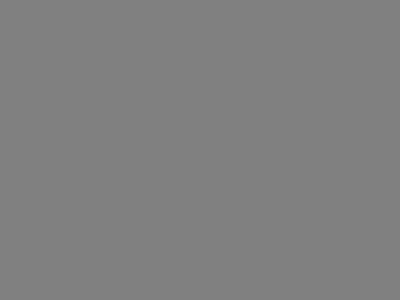
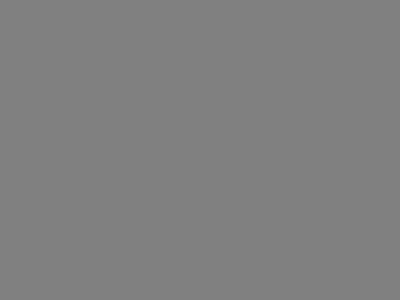

In [24]:
dashboard = pn.Row(pn.Column(
    selector_image,
    selector_kernel,
    button_run_convolution),
    pane_source_image,
    pane_convolved_image,
                   styles=dict(background='WhiteSmoke')
)
# Display the dashboard
dashboard.servable()

Column
    [0] RadioButtonGroup(button_type='primary', name='Select Image', options=['Image 1', 'Image 2', ...], value='Image 1')
    [1] Row
        [0] JPG(str, height=200, sizing_mode='fixed', width=200)
        [1] JPG(str, height=200, sizing_mode='fixed', width=200)
        [2] JPG(str, height=200, sizing_mode='fixed', width=200)
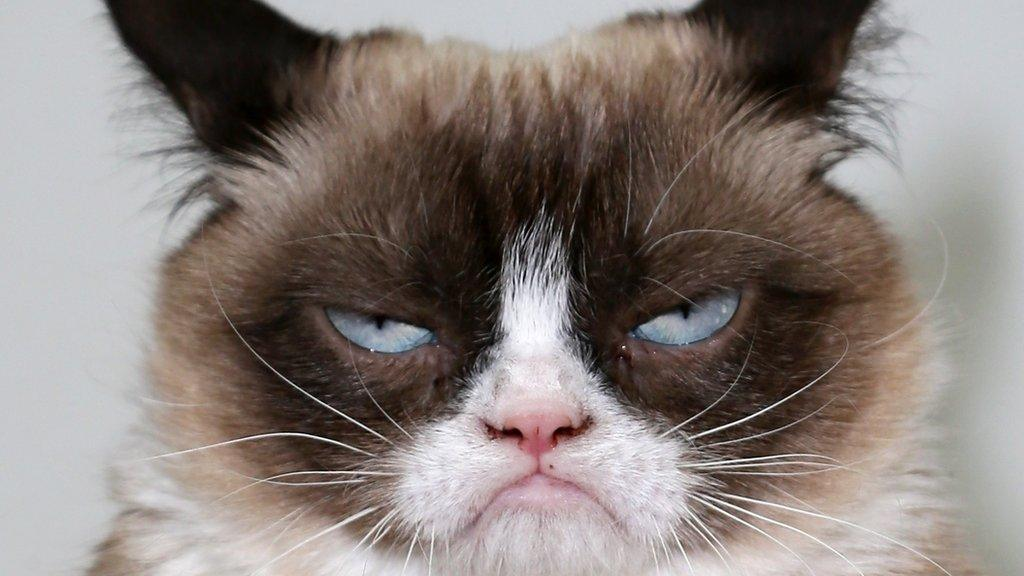
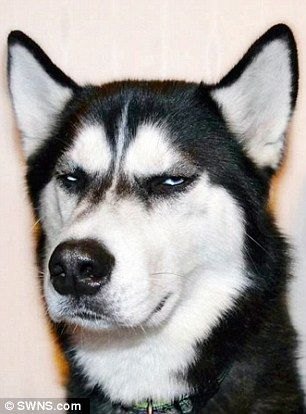
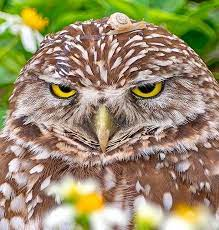

In [14]:
# Create image panes
image_panes = {
    name: pn.pane.JPG(path, width=200, height=200)
    for name, path in image_paths.items()
}

# Create the toggle group
radio_group = pn.widgets.RadioButtonGroup(name="Select Image", options=list(image_paths.keys()), button_type='primary')


# Function to update the displayed images
def update_images(event):
    active_image = radio_group.value
    for name, pane in image_panes.items():
        if name == active_image:
            pane.styles = {'border-color': 'green','border-style': 'solid'} 
        else:
            pane.styles = {'border-color': 'gray','border-style': 'solid'} # Apply grayscale style

radio_group.param.watch(update_images, 'value')


# Initial display (set one image to color initially)
#update_images(pn.events.ParamEvent(radio_group, 'value', None, radio_group.value[0]))


# Layout the elements
layout = pn.Column(
    radio_group,
    pn.Row(
        image_panes['Image 1'],
        image_panes['Image 2'],
        image_panes['Image 3']
    )
)

layout.servable()


In [27]:
from PIL import Image

In [53]:
def arr_to_img(kernel):
    fig, ax = plt.subplots(1,1)
    ax.imshow(kernel, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.close()
    return fig

Column
    [0] RadioButtonGroup(button_type='primary', name='Select Image', options=['vertical', 'horizontal',...], value='vertical')
    [1] Row
        [0] Image(Figure, height=300, sizing_mode='fixed', width=300)
        [1] Image(Figure, height=300, sizing_mode='fixed', width=300)
        [2] Image(Figure, height=300, sizing_mode='fixed', width=300)
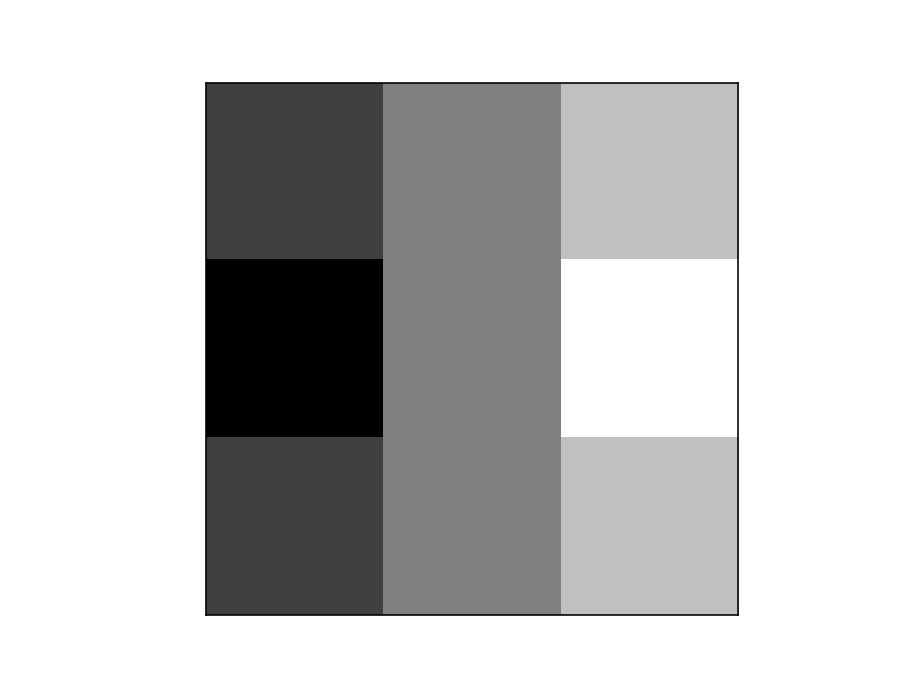
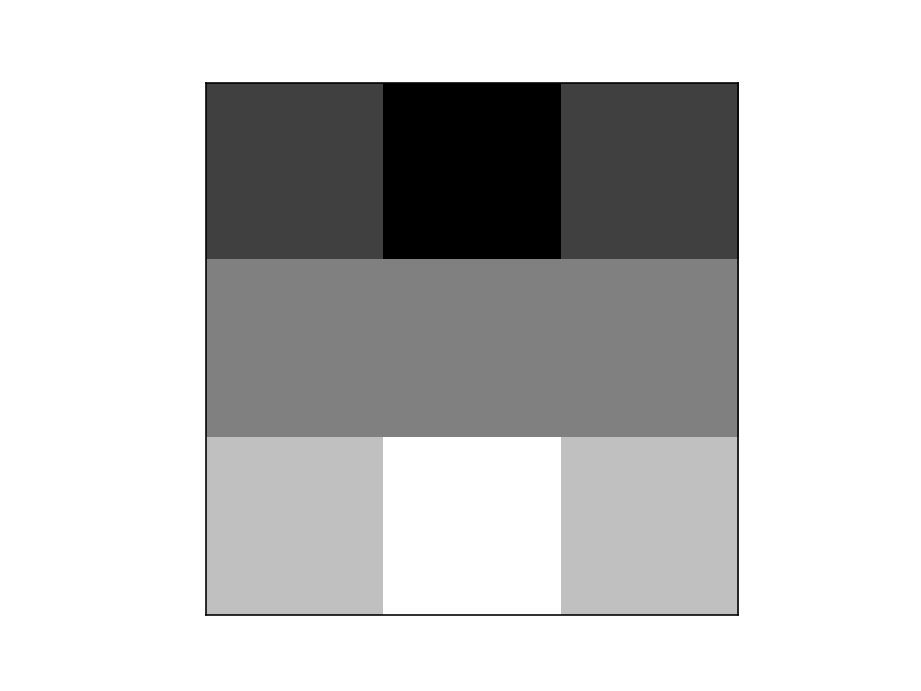
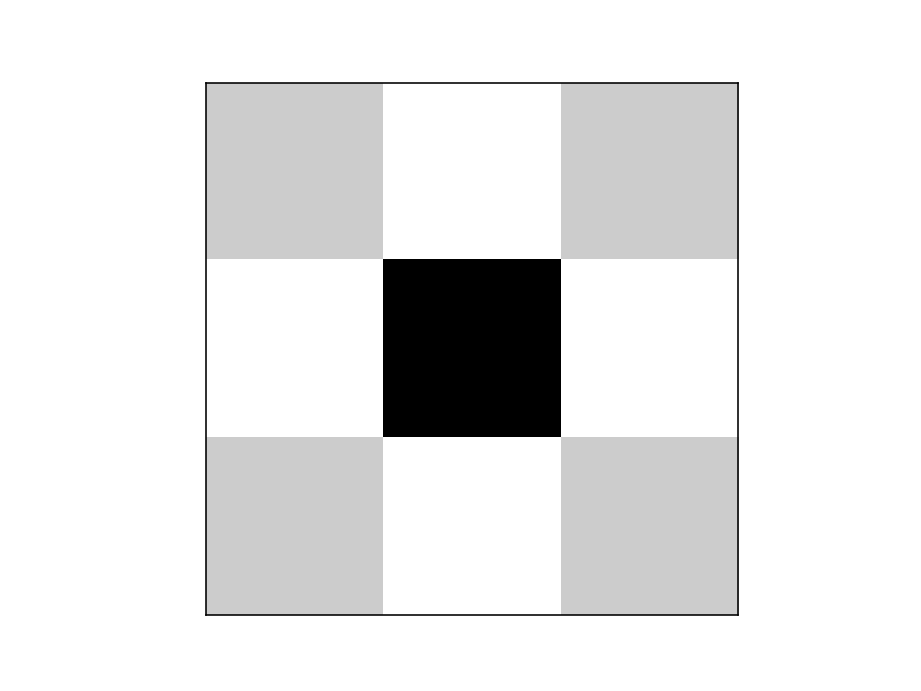

In [54]:
# Create image panes
image_panes = {
    name: pn.pane.Image(object=arr_to_img(kernel), width=300, height=300)
    for name, kernel in kernels.items()
}

# Create the toggle group
radio_group = pn.widgets.RadioButtonGroup(name="Select Image", options=list(image_panes.keys()), button_type='primary')


# Function to update the displayed images
def update_images(event):
    active_image = radio_group.value
    for name, pane in image_panes.items():
        if name == active_image:
            pane.styles = {'border-color': 'red','border-style': 'solid'} 
        else:
            pane.styles = {'border-color': 'gray','border-style': 'solid'} # Apply grayscale style

radio_group.param.watch(update_images, 'value')


# Initial display (set one image to color initially)
#update_images(pn.events.ParamEvent(radio_group, 'value', None, radio_group.value[0]))


# Layout the elements
layout = pn.Column(
    radio_group,
    pn.Row(
        *image_panes.values()
    )
)

layout.servable()
